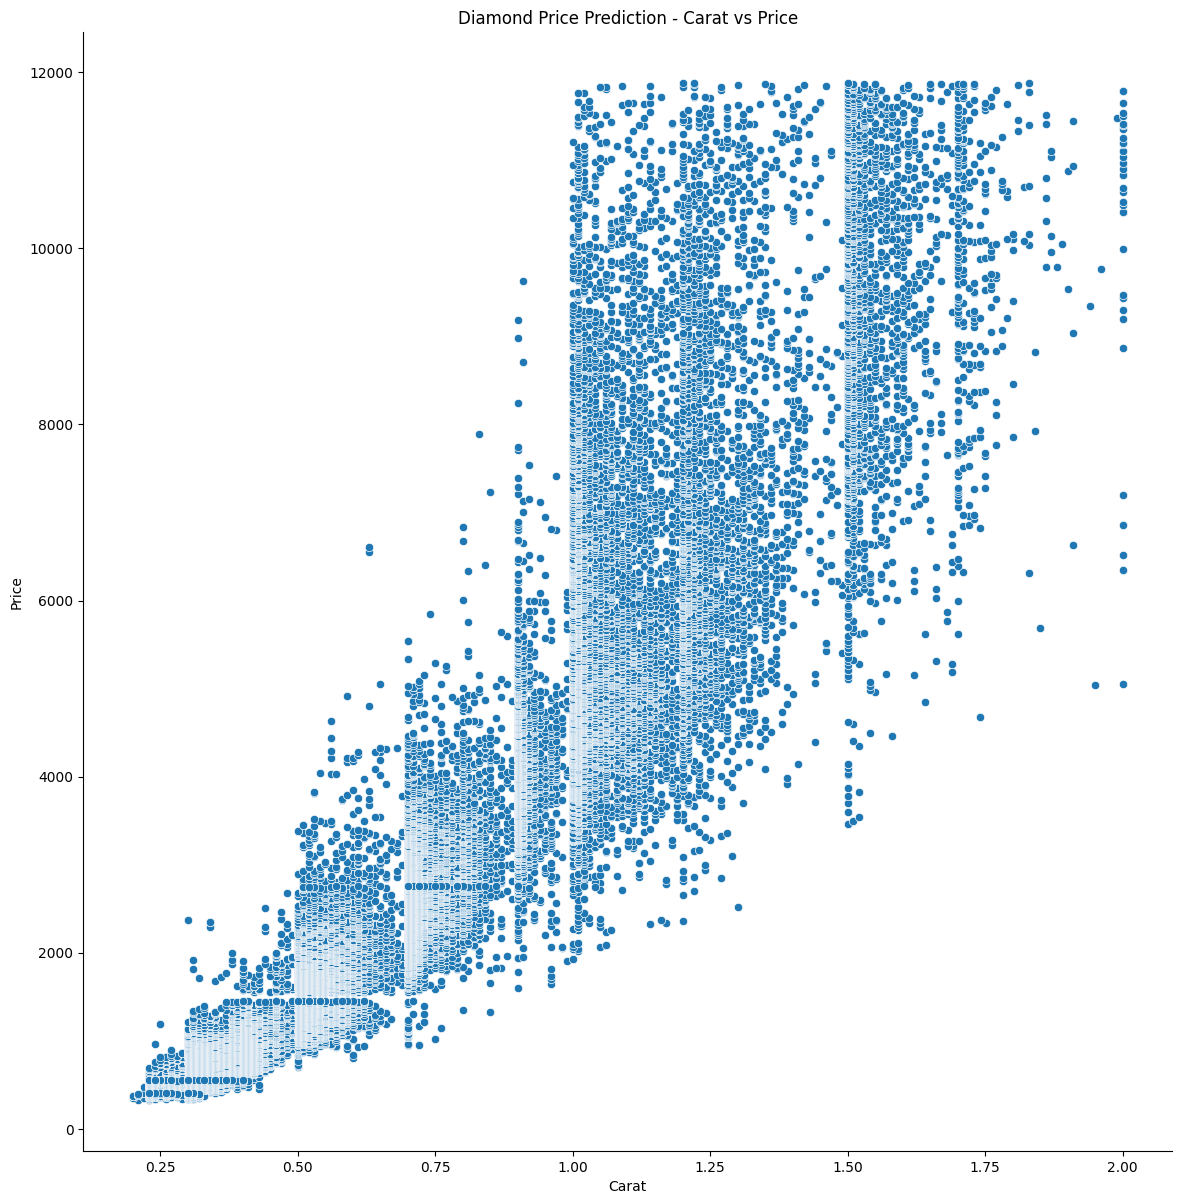

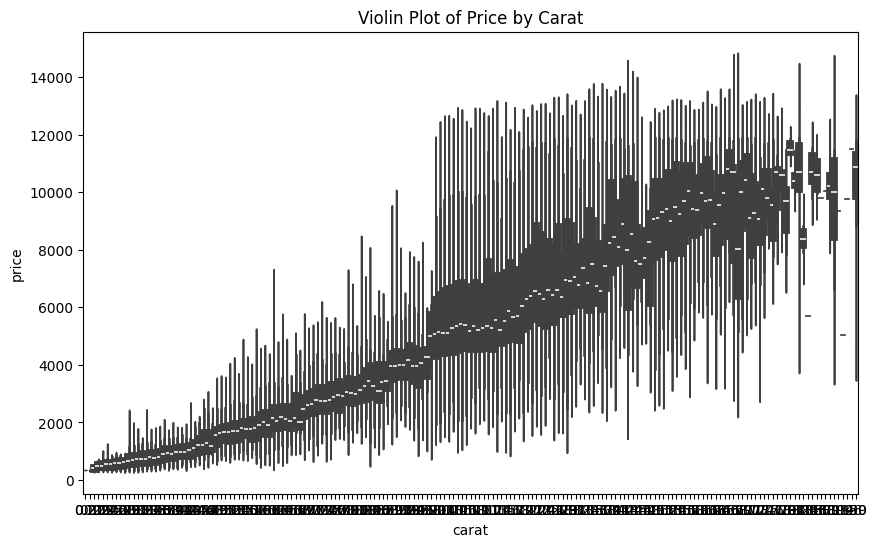

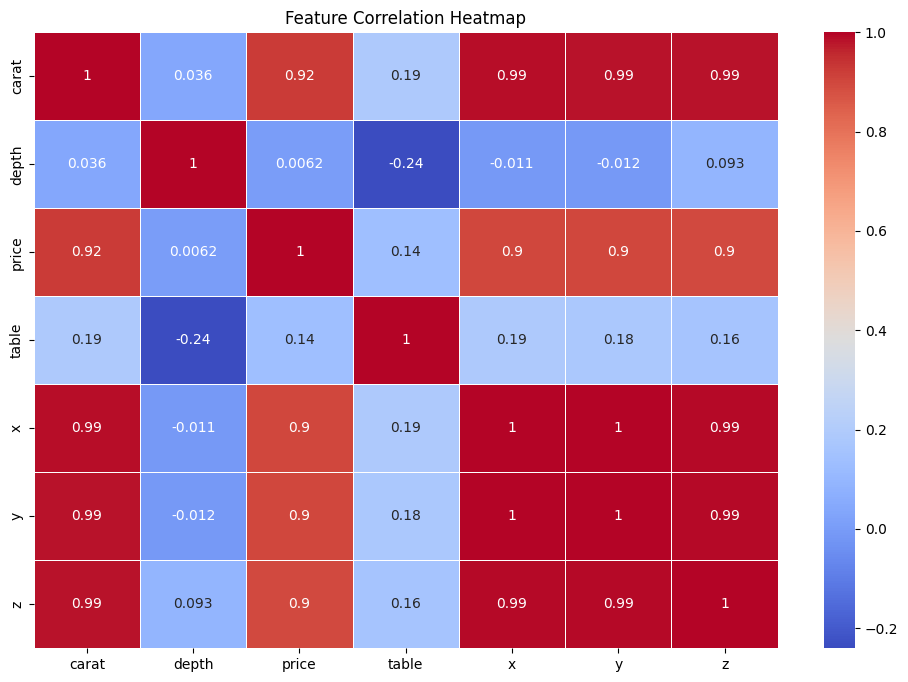

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


data = pd.read_csv("./diamonds.csv")

data.fillna(data.mean(numeric_only=True), inplace=True)
data.drop_duplicates(inplace=True)
data.drop(columns=['Unnamed: 0'], inplace=True)

Q1 = data.quantile(0.25, numeric_only=True)
Q3 = data.quantile(0.75, numeric_only=True)

IQR = Q3 - Q1

data, Q1 = data.align(Q1, axis=1, copy=False)
data, Q2 = data.align(Q3, axis=1, copy=False)
data, IQR = data.align(IQR, axis=1, copy=False)

data < Q1

data = data[
  ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
]

sns.pairplot(
  data,x_vars=['carat'],y_vars=['price'],height=12,kind='scatter'
)

plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Diamond Price Prediction - Carat vs Price')

plt.show()


plt.figure(figsize=(10, 6))

sns.violinplot(x="carat", y="price", data=data)

plt.title("Violin Plot of Price by Carat")
plt.show()

plt.figure(figsize=(12, 8))

sns.heatmap(
  data.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5
)
plt.title("Feature Correlation Heatmap")

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


